(365, 30) (365, 30) (365, 30)


'for i in range(4):\n    ax[i][0].set_ylim(-50,0)\n    ax[i][1].set_ylim(-50,0)'

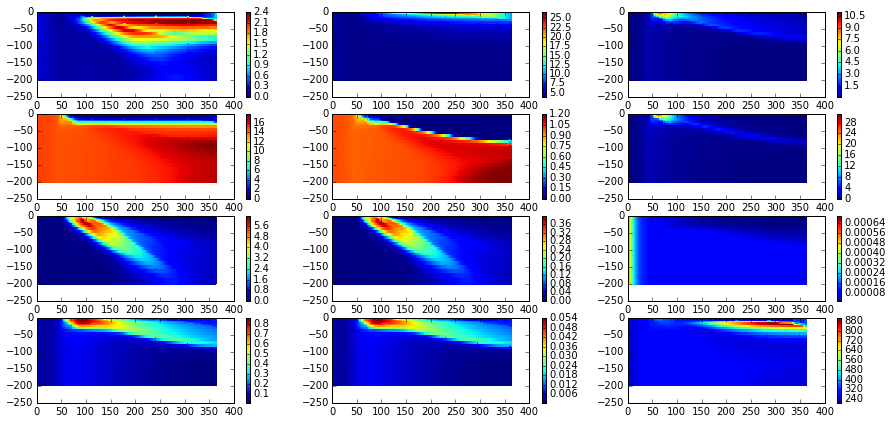

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

ncfile = '/Users/teruhisa/ROMS/test/bio_toy/ocean_his.nc'
nc = netCDF4.Dataset(ncfile, 'r')
nc.variables.keys()
time=nc.variables['ocean_time'][:]/24/3600
h=nc.variables['h'][1,1]
cs_r=nc.variables['Cs_r'][:]
depth=h*cs_r[:]
temp=nc.variables['temp'][:,:,1,1]

NO3=nc.variables['NO3'][:,:,1,1]
NH4=nc.variables['NH4'][:,:,1,1]
LDeN=nc.variables['LdetritusN'][:,:,1,1]
SDeN=nc.variables['SdetritusN'][:,:,1,1]
phyt=nc.variables['phytoplankton'][:,:,1,1]
zoop=nc.variables['zooplankton'][:,:,1,1]
chlo=nc.variables['chlorophyll'][:,:,1,1]

PO4=nc.variables['PO4'][:,:,1,1]
LDeP=nc.variables['LdetritusP'][:,:,1,1]
SDeP=nc.variables['SdetritusP'][:,:,1,1]

DO=nc.variables['oxygen'][:,:,1,1]

depth, time = np.meshgrid(depth, time)
print time.shape, depth.shape, NH4.shape

fig, ax = plt.subplots(4, 3,figsize=(15,7))
pc = [0 for _ in range(12)]

pc[0] = ax[0][0].pcolor(time, depth, NH4)
pc[1] = ax[1][0].pcolor(time, depth, NO3)
pc[2] = ax[2][0].pcolor(time, depth, LDeN)
pc[3] = ax[3][0].pcolor(time, depth, SDeN)

pc[4] = ax[0][1].pcolor(time, depth, temp)
pc[5] = ax[1][1].pcolor(time, depth, PO4)
pc[6] = ax[2][1].pcolor(time, depth, LDeP)
pc[7] = ax[3][1].pcolor(time, depth, SDeP)

pc[8] = ax[0][2].pcolor(time, depth, phyt)
pc[9] = ax[1][2].pcolor(time, depth, chlo)
pc[10] = ax[2][2].pcolor(time, depth, zoop)
pc[11] = ax[3][2].pcolor(time, depth, DO)

for x in range(3):
    for y in range(4):
        plt.colorbar(pc[y+x*4], ax=ax[y][x])

"""for i in range(4):
    ax[i][0].set_ylim(-50,0)
    ax[i][1].set_ylim(-50,0)"""

(364, 30) (364, 30) (364, 30)


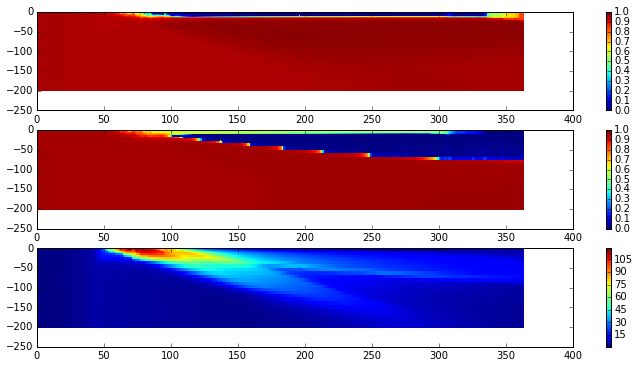

In [6]:
ncfile = '/Users/teruhisa/ROMS/test/bio_toy/ocean_dia.nc'
nc = netCDF4.Dataset(ncfile, 'r')

time = nc.variables['ocean_time'][:]/24/3600
h=nc.variables['h'][1,1]
cs_r=nc.variables['Cs_r'][:]
depth=h*cs_r[:]
depth, time = np.meshgrid(depth, time)

LNH4=nc.variables['LNH4'][:,:,2,2]
LNO3=nc.variables['LNO3'][:,:,2,2]
if 'LPO4' in nc.variables.keys():
    LPO4=nc.variables['LPO4'][:,:,2,2]
if 'COD' in nc.variables.keys():
    COD=nc.variables['COD'][:,:,2,2]
    
print time.shape, depth.shape, LNH4.shape

fig, ax = plt.subplots(3,1,figsize=(12,6))

pc0 = ax[0].pcolor(time, depth, LNO3+LNH4, vmax=1, vmin=0)
plt.colorbar(pc0, ax=ax[0])
if 'LPO4' in nc.variables.keys():
    pc1 = ax[1].pcolor(time, depth, LPO4, vmax=1, vmin=0)
    plt.colorbar(pc1, ax=ax[1])
if 'COD' in nc.variables.keys():
    pc2 = ax[2].pcolor(time, depth, COD)
    plt.colorbar(pc2, ax=ax[2])